In [198]:
import numpy as np
import pandas as pd
from IPython.core.display import display

pd.set_option('display.max_columns', None)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBRFClassifier
import warnings
import classifier_utils
import seaborn as sns
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict, GridSearchCV, validation_curve

In [7]:
non_features_columns = ["chunk_id", "line_start", "line_end", "line_separator", "kind_conflict", "url", "project"]
non_features_columns.extend(["project_user", "project_name", "path", "file_name", "sha", "leftsha", "rightsha", "basesha"])

In [8]:
selected_dataset = pd.read_csv("../../data/SELECTED_LABELLED_DATASET.csv")
projects = list(selected_dataset['project'].unique())

# Class distributions

### Normalized (%)

In [9]:
class_distribution_normalized = classifier_utils.get_projects_class_distribution(projects)

class_distribution_normalized

,Project,Version 1,Version 2,Combination,ConcatenationV1V2,ConcatenationV2V1,Manual,None
0,Ramblurr/Anki-Android,43.87,29.25,8.43,1.32,0.92,16.07,0.13
1,apache/directory-server,47.39,51.23,0.15,0.00,0.00,1.23,0.00
2,android/platform_frameworks_base,70.77,7.64,9.02,2.68,1.42,8.13,0.33
3,freenet/fred,40.42,16.50,23.32,6.23,0.49,12.94,0.10
4,alexo/wro4j,30.70,14.77,28.65,0.88,1.02,23.61,0.37
5,apache/lucene-solr,25.05,26.59,20.33,5.24,0.31,21.66,0.82
6,elastic/elasticsearch,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,getrailo/railo,31.99,37.76,8.74,7.17,0.35,13.81,0.17
8,atlasapi/atlas,24.04,44.50,12.40,5.37,0.90,12.53,0.26
9,hibernate/hibernate-orm,23.88,20.11,31.15,7.40,1.12,14.11,2.23


### Count

In [10]:
class_distribution_count = classifier_utils.get_projects_class_distribution(projects, False)

class_distribution_count

,Project,Version 1,Version 2,Combination,ConcatenationV1V2,ConcatenationV2V1,Manual,None
0,Ramblurr/Anki-Android,333,222,64,10,7,122,1
1,apache/directory-server,309,334,1,0,0,8,0
2,android/platform_frameworks_base,1741,188,222,66,35,200,8
3,freenet/fred,409,167,236,63,5,131,1
4,alexo/wro4j,420,202,392,12,14,323,5
5,apache/lucene-solr,244,259,198,51,3,211,8
6,elastic/elasticsearch,0,0,0,0,0,0,0
7,getrailo/railo,183,216,50,41,2,79,1
8,atlasapi/atlas,188,348,97,42,7,98,2
9,hibernate/hibernate-orm,171,144,223,53,8,101,16


# Decision Tree

### Base classifier

In [11]:
dt = DecisionTreeClassifier(min_samples_split=5, random_state=99)



In [14]:
result_dt = classifier_utils.ProjectsResults(dt, projects, non_features_columns)

In [15]:
report_dt = result_dt.get_report_df()

report_dt


,project,observations,observations (wt NaN),precision,recall,f1-score,accuracy,baseline (majority),improvement
26,CCI-MIT__XCoLab,5512,3757,0.973,0.971,0.972,0.971,0.573,0.931
1,apache__directory-server,845,652,0.922,0.923,0.923,0.923,0.512,0.843
24,jgralab__jgralab,2072,1802,0.823,0.819,0.820,0.819,0.491,0.643
19,Unidata__thredds,1154,950,0.902,0.901,0.901,0.901,0.777,0.557
18,apache__accumulo,4113,3148,0.838,0.835,0.836,0.835,0.635,0.548
10,CloudStack-extras__CloudStack-archive,1424,1106,0.699,0.700,0.699,0.700,0.437,0.467
0,Ramblurr__Anki-Android,892,759,0.678,0.681,0.679,0.681,0.439,0.432
5,apache__lucene-solr,1256,974,0.573,0.568,0.569,0.568,0.266,0.411
7,getrailo__railo,815,572,0.636,0.631,0.633,0.631,0.378,0.407
11,TeamDev-Ltd__OpenFaces,2979,2859,0.964,0.963,0.964,0.963,0.938,0.403


### Inspect project

In [16]:
sample_project_dt = result_dt.get_project('sebastianbenz__Jnario')

,precision,recall,f1-score,support
Combination,0.000000,0.000000,0.000000,1.000000
Manual,0.000000,0.000000,0.000000,5.000000
None,0.000000,0.000000,0.000000,1.000000
Version 1,0.999143,0.999510,0.999327,8166.000000
accuracy,0.998654,0.998654,0.998654,0.998654
macro avg,0.249786,0.249878,0.249832,8173.000000
weighted avg,0.998287,0.998654,0.998471,8173.000000


None

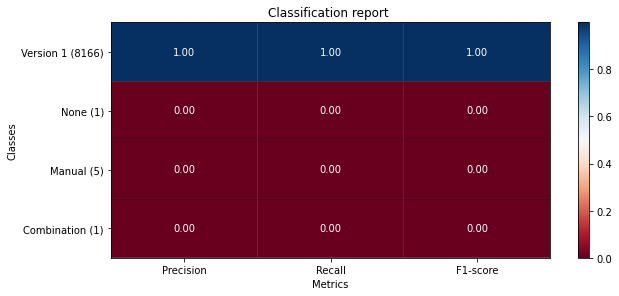

In [17]:
display(sample_project_dt.get_scores_df())
display(classifier_utils.plot_classification_report(sample_project_dt.scores))

### Tuning hyperparameters (TODO)


In [110]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 99,
 'splitter': 'best'}

In [121]:
parameters_dt = {'criterion':('gini', 'entropy'),
              'min_samples_leaf':[1, 2, 3],
              # 'max_depth':[None, 3, 5, 10],
              'max_depth':[None, 5, 20, 30]
                 }

result_dt = classifier_utils.grid_search(projects[0], dt, parameters_dt, non_features_columns)

df_gridsearch_dt = pd.DataFrame(result_dt)\
    .filter(regex=("param_.*|mean_test_score|std_test_score|rank_test_score"))\
    .sort_values(by=['rank_test_score'])

df_gridsearch_dt

Fitting 10 folds for each of 24 candidates, totalling 240 fits


Best params and score:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1}
0.6917719298245614




,param_criterion,param_max_depth,param_min_samples_leaf,mean_test_score,std_test_score,rank_test_score
16,entropy,5,2,0.691772,0.048207,1
15,entropy,5,1,0.691772,0.047117,1
17,entropy,5,3,0.690456,0.047126,3
21,entropy,30,1,0.681070,0.047340,4
18,entropy,20,1,0.681070,0.047340,4
12,entropy,None,1,0.681070,0.047340,4
0,gini,None,1,0.681053,0.058606,7
9,gini,30,1,0.681053,0.058606,7
3,gini,5,1,0.679895,0.049639,9
4,gini,5,2,0.679895,0.049639,9


# Random Forest

### Base classifier

In [112]:
rf = RandomForestClassifier(random_state=99)
result_rf = classifier_utils.ProjectsResults(rf, projects, non_features_columns)

In [ ]:
report_rf = result_rf.get_report_df()

report_rf

### Inspect project

In [ ]:
sample_project_rf = result_rf.get_project('alexo__wro4j')

In [ ]:
display(sample_project_rf.get_scores_df())
display(classifier_utils.plot_classification_report(sample_project_rf.scores))

### Tuning hyperparameters (TODO)

In [113]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 99,
 'verbose': 0,
 'warm_start': False}

In [179]:
parameters_rf = {
                # 'criterion':('gini', 'entropy'),
              # 'min_samples_leaf':[1, 2, 3],
              # 'max_depth':[None, 10, 20, 30],
              # 'n_estimators': [10, 50, 90, 100, 110, 150, 200]
              'n_estimators': [100, 200]
                 }

proj = projects[2]

result_rf = classifier_utils.grid_search(proj, rf, parameters_rf, non_features_columns)

df_gridsearch_rf = pd.DataFrame(result_rf)\
    .filter(regex=("param_.*|mean_test_score|std_test_score|rank_test_score"))\
    .sort_values(by=['rank_test_score'])

df_gridsearch_rf.insert(0, 'project', proj)

df_gridsearch_rf


Length of df_clean: 2460
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best params and score:
{'n_estimators': 200}
0.8073170731707318




,project,param_n_estimators,mean_test_score,std_test_score,rank_test_score
1,android/platform_frameworks_base,200,0.807317,0.018107,1
0,android/platform_frameworks_base,100,0.803252,0.017644,2


In [133]:
df_gridsearch_rf_copy = df_gridsearch_rf.copy()
df_gridsearch_rf_copy.insert(0, 'Name', 'abc')

df_gridsearch_rf_copy2 = df_gridsearch_rf.copy()
df_gridsearch_rf_copy2.insert(0, 'Name', 'foo')

pd.concat([df_gridsearch_rf_copy, df_gridsearch_rf_copy2])

,Name,param_n_estimators,mean_test_score,std_test_score,rank_test_score
5,abc,150,0.807317,0.020823,1
6,abc,200,0.807317,0.018107,1
2,abc,90,0.804878,0.017626,3
4,abc,110,0.804472,0.019618,4
1,abc,50,0.804065,0.014175,5
0,abc,10,0.803659,0.017724,6
3,abc,100,0.803252,0.017644,7
5,foo,150,0.807317,0.020823,1
6,foo,200,0.807317,0.018107,1
2,foo,90,0.804878,0.017626,3


In [181]:
parameters_rf = {
                # 'criterion':('gini', 'entropy'),
              # 'min_samples_leaf':[1, 2, 3],
              # 'max_depth':[None, 10, 20, 30],
              # 'n_estimators': [10, 50, 90, 100, 110, 150, 200]
              'n_estimators': [50, 100, 150, 200]
                 }

dfs = []

for project in projects[:10]:
    print("\n=== ", project, " ===")
    result = classifier_utils.grid_search(project, rf, parameters_rf, non_features_columns)
    if result != None:
        df_gridsearch_proj = pd.DataFrame(result)\
            .filter(regex=("param_.*|mean_test_score|std_test_score|rank_test_score"))\
            .sort_values(by=['rank_test_score'])
        df_gridsearch_proj.insert(0, 'project', project.replace("/", "__"))
        # print(df_gridsearch_proj)
        display(df_gridsearch_proj)
        dfs.append(df_gridsearch_proj)

large_df = pd.concat(dfs, ignore_index=True)

large_df


===  Ramblurr/Anki-Android  ===
Length of df_clean: 759
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best params and score:
{'n_estimators': 100}
0.7444035087719298




,project,param_n_estimators,mean_test_score,std_test_score,rank_test_score
0,Ramblurr__Anki-Android,100,0.744404,0.048569,1
1,Ramblurr__Anki-Android,200,0.741772,0.045988,2



===  apache/directory-server  ===
Length of df_clean: 652
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best params and score:
{'n_estimators': 200}
0.927948717948718




,project,param_n_estimators,mean_test_score,std_test_score,rank_test_score
1,apache__directory-server,200,0.927949,0.029780,1
0,apache__directory-server,100,0.924872,0.030898,2



===  android/platform_frameworks_base  ===
Length of df_clean: 2460
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best params and score:
{'n_estimators': 200}
0.8073170731707318




,project,param_n_estimators,mean_test_score,std_test_score,rank_test_score
1,android__platform_frameworks_base,200,0.807317,0.018107,1
0,android__platform_frameworks_base,100,0.803252,0.017644,2



===  freenet/fred  ===
Length of df_clean: 1012
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best params and score:
{'n_estimators': 200}
0.679800038827412




,project,param_n_estimators,mean_test_score,std_test_score,rank_test_score
1,freenet__fred,200,0.67980,0.038946,1
0,freenet__fred,100,0.67881,0.046758,2



===  alexo/wro4j  ===
Length of df_clean: 1368
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best params and score:
{'n_estimators': 200}
0.5898776298840704




,project,param_n_estimators,mean_test_score,std_test_score,rank_test_score
1,alexo__wro4j,200,0.589878,0.029411,1
0,alexo__wro4j,100,0.581129,0.028979,2



===  apache/lucene-solr  ===
Length of df_clean: 974
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best params and score:
{'n_estimators': 100}
0.6499579213128551




,project,param_n_estimators,mean_test_score,std_test_score,rank_test_score
0,apache__lucene-solr,100,0.649958,0.045253,1
1,apache__lucene-solr,200,0.639701,0.043230,2



===  elastic/elasticsearch  ===
Length of df_clean: 0

===  getrailo/railo  ===
Length of df_clean: 572
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best params and score:
{'n_estimators': 100}
0.7043557168784029




,project,param_n_estimators,mean_test_score,std_test_score,rank_test_score
0,getrailo__railo,100,0.704356,0.058114,1
1,getrailo__railo,200,0.702662,0.052603,2



===  atlasapi/atlas  ===
Length of df_clean: 782
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best params and score:
{'n_estimators': 100}
0.6624148003894839




,project,param_n_estimators,mean_test_score,std_test_score,rank_test_score
0,atlasapi__atlas,100,0.662415,0.058374,1
1,atlasapi__atlas,200,0.658601,0.061218,2



===  hibernate/hibernate-orm  ===
Length of df_clean: 716
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best params and score:
{'n_estimators': 200}
0.5937793427230047




,project,param_n_estimators,mean_test_score,std_test_score,rank_test_score
1,hibernate__hibernate-orm,200,0.593779,0.049649,1
0,hibernate__hibernate-orm,100,0.589613,0.057234,2


,project,param_n_estimators,mean_test_score,std_test_score,rank_test_score
0,Ramblurr__Anki-Android,100,0.744404,0.048569,1
1,Ramblurr__Anki-Android,200,0.741772,0.045988,2
2,apache__directory-server,200,0.927949,0.029780,1
3,apache__directory-server,100,0.924872,0.030898,2
4,android__platform_frameworks_base,200,0.807317,0.018107,1
5,android__platform_frameworks_base,100,0.803252,0.017644,2
6,freenet__fred,200,0.679800,0.038946,1
7,freenet__fred,100,0.678810,0.046758,2
8,alexo__wro4j,200,0.589878,0.029411,1
9,alexo__wro4j,100,0.581129,0.028979,2


In [184]:
large_df.groupby(large_df['project']).mean()

,mean_test_score,std_test_score,rank_test_score
project,,,
Ramblurr__Anki-Android,0.743088,0.047278,1.5
alexo__wro4j,0.585503,0.029195,1.5
android__platform_frameworks_base,0.805285,0.017875,1.5
apache__directory-server,0.926410,0.030339,1.5
apache__lucene-solr,0.644830,0.044242,1.5
atlasapi__atlas,0.660508,0.059796,1.5
freenet__fred,0.679305,0.042852,1.5
getrailo__railo,0.703509,0.055358,1.5
hibernate__hibernate-orm,0.591696,0.053441,1.5


Length of df_clean: 759


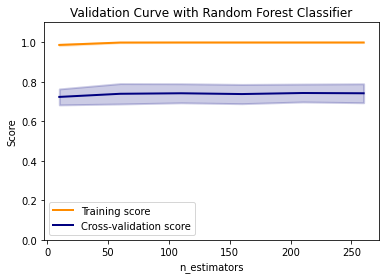

Length of df_clean: 652


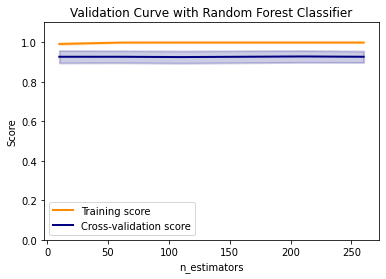

Length of df_clean: 2460


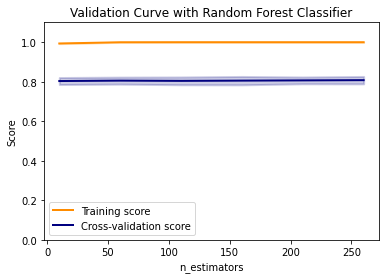

In [211]:
for project in projects[:3]:
    classifier_utils.get_validation_curve(project, rf, 'n_estimators',
                                      # [10, 50, 100, 150, 200, 300],
                                      np.arange(10, 300, 50),
                                      non_features_columns)

Length of df_clean: 759


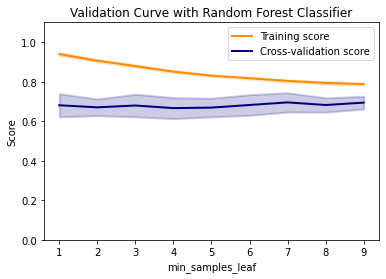

Length of df_clean: 652


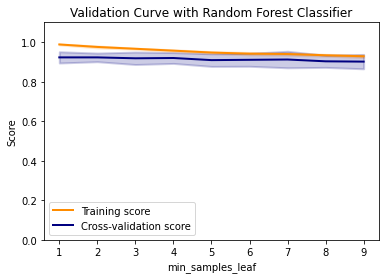

Length of df_clean: 2460


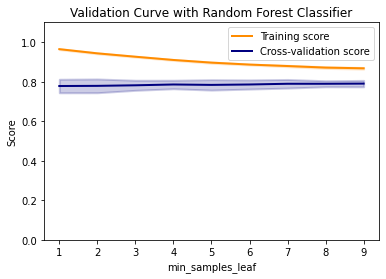

Length of df_clean: 1012


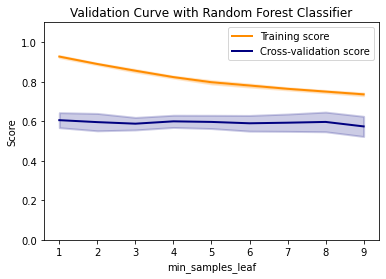

Length of df_clean: 1368


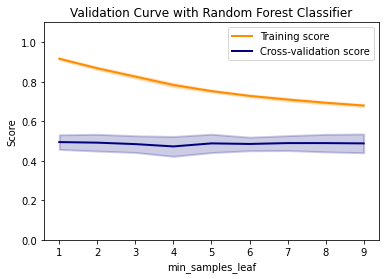

Length of df_clean: 974


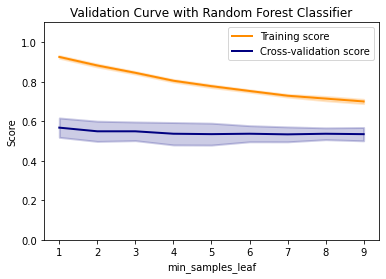

Length of df_clean: 0
Length of df_clean: 572


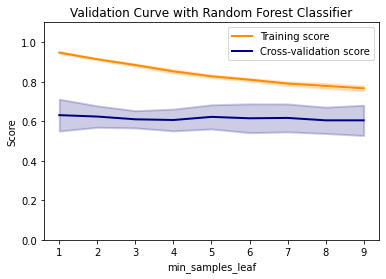

Length of df_clean: 782


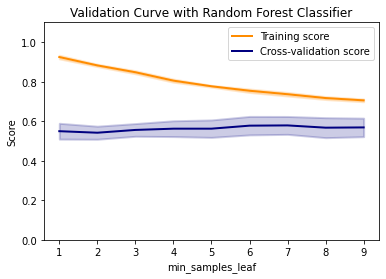

Length of df_clean: 716


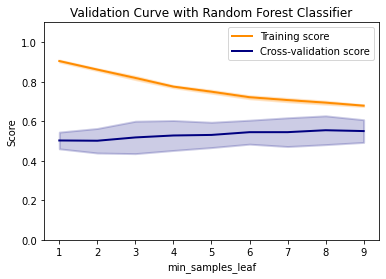

In [210]:
for project in projects[:10]:
    classifier_utils.get_validation_curve(project, dt, 'min_samples_leaf',
                                      # [10, 50, 100, 150, 200, 300],
                                      np.arange(1, 10, 1),
                                      non_features_columns)


In [204]:
np.arange(10, 500, 50)

array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460])

In [169]:
classifier_utils.grid_search(projects[7], rf, parameters_rf, non_features_columns)

Length of df_clean: 572
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best params and score:
{'n_estimators': 100}
0.7043557168784029




{'mean_fit_time': array([0.15596442, 0.29947796]),
 'std_fit_time': array([0.01042385, 0.04192511]),
 'mean_score_time': array([0.01037943, 0.01697938]),
 'std_score_time': array([0.00153286, 0.00196167]),
 'param_n_estimators': masked_array(data=[100, 200],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 100}, {'n_estimators': 200}],
 'split0_test_score': array([0.74137931, 0.70689655]),
 'split1_test_score': array([0.77586207, 0.77586207]),
 'split2_test_score': array([0.73684211, 0.71929825]),
 'split3_test_score': array([0.68421053, 0.71929825]),
 'split4_test_score': array([0.77192982, 0.77192982]),
 'split5_test_score': array([0.61403509, 0.63157895]),
 'split6_test_score': array([0.73684211, 0.71929825]),
 'split7_test_score': array([0.70175439, 0.70175439]),
 'split8_test_score': array([0.68421053, 0.68421053]),
 'split9_test_score': array([0.59649123, 0.59649123]),
 'mean_test_score': array([0.70435572, 0.7026

In [202]:
import importlib
importlib.reload(classifier_utils)

<module 'classifier_utils' from '/Users/paulo/sandbox2/conflict-resolution-mining/scripts/exploratory_analysis/classifier_utils.py'>

In [162]:
# result = classifier_utils.grid_search(projects[6], rf, parameters_rf, non_features_columns)
# result
estimator = rf
parameters = parameters_rf

proj = projects[6].replace("/", "__")
print("\n", proj)
proj_dataset = f"../../data/projects/{proj}-training.csv"
df_proj = pd.read_csv(proj_dataset)
df_clean = df_proj.dropna()
print(f"Length of df_clean: {len(df_clean)}")
if len(df_clean) >= 10:
    y = df_clean["developerdecision"].copy()
    df_clean_features = df_clean.drop(columns=['developerdecision']) \
                                .drop(columns=non_features_columns)
    features = list(df_clean_features.columns)
    X = df_clean_features[features]
    clf = GridSearchCV(estimator, parameters, verbose=1, cv=10)
    clf.fit(X, y)
    print('\n', "Best params and score:", clf.best_params_, clf.best_score_, '\n',
          # clf.cv_results_,
          sep='\n')
else:
    print(None)

elastic__elasticsearch
Length of df_clean: 0
None


# Random Forest (XGBoost)

### Base classifier

In [ ]:
rf_xg = XGBRFClassifier(random_state=99, n_estimators=100, subsample=0.9, colsample_bynode=0.2, eval_metric='mlogloss')
result_rf_xg = classifier_utils.ProjectsResults(rf_xg, projects, non_features_columns, drop_na=False)

In [ ]:
report_rf_xg = result_rf_xg.get_report_df()

report_rf_xg

### Inspect project

In [ ]:
project = result_rf_xg.get_project('alexo__wro4j')

In [ ]:
display(project.get_scores_df())
display(display(classifier_utils.plot_classification_report(project.scores)))

### Tuning hyperparameters (TODO)

# Tuned algorithms' comparison (TODO)

In [ ]:
import importlib
importlib.reload(classifier_utils)
                 
# setup the algorithms with the desired parameters
algorithms = {}
algorithms['sklearn-decisionTree'] = DecisionTreeClassifier(min_samples_split=5, random_state=99)
# algorithms['sklearn-adaboost'] = AdaBoostClassifier(n_estimators=100, random_state=99)
algorithms['sklearn-randomForest'] = RandomForestClassifier(random_state=99)
# algorithms['xgBoost-randomForest'] = XGBRFClassifier(random_state=99, n_estimators=100, subsample=0.9, colsample_bynode=0.2, eval_metric='mlogloss')


results = []
for project in projects:
    for algorithm_name, algorithm in algorithms.items():
        row = []
        project_results = classifier_utils.evaluate_project(project, non_features_columns, algorithm)
        result = project_results.results
        precision = result.iloc[0]['precision']
        recall = result.iloc[0]['recall']
        f1_score = result.iloc[0]['f1-score']
        accuracy = result.iloc[0]['accuracy']
        majority_class = result.iloc[0]['baseline (majority)']
        improvement = result.iloc[0]['improvement']
        row = [project, algorithm_name, precision, recall, f1_score, accuracy, majority_class, improvement]
        results.append(row)
    
results = pd.DataFrame(results, columns=['project', 'algorithm', 'precision', 'recall', 'f1-score', 'accuracy', 'baseline (majority)', 'improvement'])
results.sort_values('improvement', ascending=False)
# print(results)
# pd.concat(results, ignore_index=True)

## Comparing algorithms' reports

First let's merge the reports from Decision Tree, Random Forest and Random Forest XGBoost in a big table.

In [ ]:
df_inner_dt_rf = pd.merge(report_dt, report_rf, on='project', how='inner', suffixes=('_dt', '_rf'))

df_xg = report_rf_xg.add_suffix("_xg").rename(columns={"project_xg": "project"})

df_inner_dt_rf_xg = pd.merge(df_inner_dt_rf,
                             df_xg,
                             on='project', how='inner')

df_inner_dt_rf_xg


### How much accuracy improvement does each algorithm provide to the projects?

In [ ]:
improvements = df_inner_dt_rf_xg.filter(regex=("project|improvement.*"))

# improvements

In [ ]:
cm = sns.light_palette("green", as_cmap=True)

improvements.style.background_gradient(cmap = cm).format({'improvement_dt' : "{:.2%}",
                           'improvement_rf' : "{:.2%}",
                           'improvement_xg': "{:.2%}"})

## For each project, which algorithm provides the highest accuracy improvement?

In [ ]:
winner_algo = improvements.set_index('project').idxmax(axis=1)

winner_algo

## In how many projects does each algorithm provide the highest accuracy improvement?

In [ ]:
winner_algo.groupby(winner_algo).size().sort_values(ascending=False)
